In [58]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

In [20]:
data_set = pd.read_csv("data.csv", encoding = "latin-1")
data_set.head(2)

,realtime_start,date,realtime_end,value
0,2019-10-06,1992-02-01,2019-10-06,0.1
1,2019-10-06,1992-03-01,2019-10-06,-0.3


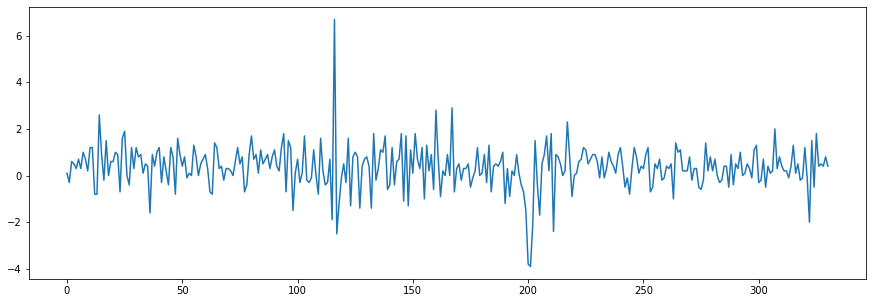

In [49]:
plt.figure(figsize = (15, 5))
plt.plot(data_set.value)
plt.show()

In [21]:
def secuencias(datos, num):
    data_x =[]
    data_y =[]
    for i in range(len(datos)):
        if i+num > len(datos)-1:
            break
        data_x.append(datos[i: i+num])
        data_y.append(datos[i+num])
    return data_x, data_y

In [79]:
data = data_set.value.values.astype("float32")
data = data.reshape(-1,1)
data.shape

(331, 1)

In [80]:
escalar = MinMaxScaler(feature_range = (-1, 1))
escalado = escalar.fit_transform(data.reshape(-1, 1))
data_set_escalado = pd.DataFrame(escalado)

In [73]:
data_set_escalado.head()

,0
0,-0.245283
1,-0.320755
2,-0.150943
3,-0.169811
4,-0.207547


In [81]:
data_x, data_y = secuencias(escalado, 1)

In [83]:
data_x, data_y = np.array(data_x), np.array(data_y)

In [85]:
data_x.shape

(330, 1, 1)

In [86]:
data_y.shape

(330, 1)

***
### Reshape
Poniendo los datos en x de la forma (observaciones, 1, 1) porque esta es una serie de tiempo univariable.

In [88]:
data_x = data_x.reshape((data_x.shape[0], 1, 1))
data_x.shape

(330, 1, 1)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 0)

In [90]:
x_train.shape, y_train.shape

((264, 1, 1), (264, 1))

In [91]:
x_test.shape, y_test.shape

((66, 1, 1), (66, 1))

***
## Construcción del modelo

In [92]:
model_1 = Sequential()
model_1.add(LSTM(32, input_shape = (1,1)))
model_1.add(Dense(1))
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [94]:
monitor_val_acc_1 = EarlyStopping(monitor = "val_acc", patience = 5)
modelCheckpoint_1 = ModelCheckpoint("rnn_model.hdf5", save_best_only = True)

model_1.compile(loss = "mean_squared_error", optimizer='adam')
history_1 = model_1.fit(x_train, y_train, epochs=100, verbose = 1, validation_split = 0.2, callbacks = [modelCheckpoint_1, monitor_val_acc_1])

Train on 211 samples, validate on 53 samples
Epoch 1/100
211/211 [==============================] - 5s 23ms/step - loss: 0.0305 - val_loss: 0.0448
Epoch 2/100
211/211 [==============================] - 0s 581us/step - loss: 0.0305 - val_loss: 0.0447
Epoch 3/100
211/211 [==============================] - 0s 123us/step - loss: 0.0304 - val_loss: 0.0448
Epoch 4/100
211/211 [==============================] - 0s 379us/step - loss: 0.0305 - val_loss: 0.0448
Epoch 5/100
211/211 [==============================] - 0s 374us/step - loss: 0.0305 - val_loss: 0.0447
Epoch 6/100
211/211 [==============================] - 0s 223us/step - loss: 0.0304 - val_loss: 0.0447
Epoch 7/100
211/211 [==============================] - 0s 242us/step - loss: 0.0305 - val_loss: 0.0448
Epoch 8/100
211/211 [==============================] - 0s 332us/step - loss: 0.0305 - val_loss: 0.0446
Epoch 9/100
211/211 [==============================] - 0s 137us/step - loss: 0.0304 - val_loss: 0.0448
Epoch 10/100
211/211 [=======

211/211 [==============================] - 0s 265us/step - loss: 0.0301 - val_loss: 0.0446
Epoch 80/100
211/211 [==============================] - 0s 232us/step - loss: 0.0301 - val_loss: 0.0445
Epoch 81/100
211/211 [==============================] - 0s 313us/step - loss: 0.0302 - val_loss: 0.0445
Epoch 82/100
211/211 [==============================] - 0s 427us/step - loss: 0.0302 - val_loss: 0.0445
Epoch 83/100
211/211 [==============================] - 0s 265us/step - loss: 0.0302 - val_loss: 0.0444
Epoch 84/100
211/211 [==============================] - 0s 294us/step - loss: 0.0301 - val_loss: 0.0445
Epoch 85/100
211/211 [==============================] - 0s 299us/step - loss: 0.0301 - val_loss: 0.0444
Epoch 86/100
211/211 [==============================] - 0s 161us/step - loss: 0.0301 - val_loss: 0.0445
Epoch 87/100
211/211 [==============================] - 0s 497us/step - loss: 0.0301 - val_loss: 0.0446
Epoch 88/100
211/211 [==============================] - 0s 346us/step - loss:

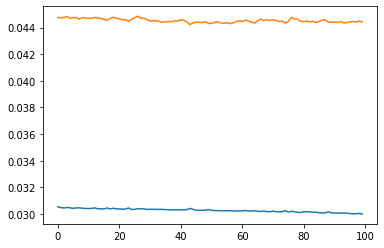

In [97]:
plt.figure()
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

***

In [99]:
monitor_val_acc_2 = EarlyStopping(monitor = "val_acc", patience = 5)
modelCheckpoint_2 = ModelCheckpoint("rnn_model_batch_size_16.hdf5", save_best_only = True)

model_1.compile(loss = "mean_squared_error", optimizer='adam')
history_2 = model_1.fit(x_train, y_train, epochs=100, batch_size = 16, verbose = 1, validation_split = 0.2, callbacks = [modelCheckpoint_2, monitor_val_acc_2])

Train on 211 samples, validate on 53 samples
Epoch 1/100
211/211 [==============================] - 6s 26ms/step - loss: 0.0282 - val_loss: 0.0487
Epoch 2/100
211/211 [==============================] - 0s 156us/step - loss: 0.0279 - val_loss: 0.0489
Epoch 3/100
211/211 [==============================] - 0s 171us/step - loss: 0.0278 - val_loss: 0.0484
Epoch 4/100
211/211 [==============================] - 0s 635us/step - loss: 0.0278 - val_loss: 0.0486
Epoch 5/100
211/211 [==============================] - 0s 161us/step - loss: 0.0279 - val_loss: 0.0486
Epoch 6/100
211/211 [==============================] - 0s 161us/step - loss: 0.0278 - val_loss: 0.0486
Epoch 7/100
211/211 [==============================] - 0s 621us/step - loss: 0.0280 - val_loss: 0.0484
Epoch 8/100
211/211 [==============================] - 0s 635us/step - loss: 0.0280 - val_loss: 0.0492
Epoch 9/100
211/211 [==============================] - 0s 341us/step - loss: 0.0279 - val_loss: 0.0490
Epoch 10/100
211/211 [=======

211/211 [==============================] - 0s 545us/step - loss: 0.0278 - val_loss: 0.0478
Epoch 80/100
211/211 [==============================] - 0s 502us/step - loss: 0.0278 - val_loss: 0.0475
Epoch 81/100
211/211 [==============================] - 0s 437us/step - loss: 0.0278 - val_loss: 0.0478
Epoch 82/100
211/211 [==============================] - 0s 280us/step - loss: 0.0278 - val_loss: 0.0479
Epoch 83/100
211/211 [==============================] - 0s 695us/step - loss: 0.0280 - val_loss: 0.0488
Epoch 84/100
211/211 [==============================] - 0s 351us/step - loss: 0.0278 - val_loss: 0.0482
Epoch 85/100
211/211 [==============================] - 0s 242us/step - loss: 0.0278 - val_loss: 0.0476
Epoch 86/100
211/211 [==============================] - 0s 564us/step - loss: 0.0278 - val_loss: 0.0475
Epoch 87/100
211/211 [==============================] - 0s 346us/step - loss: 0.0278 - val_loss: 0.0479
Epoch 88/100
211/211 [==============================] - 0s 256us/step - loss:

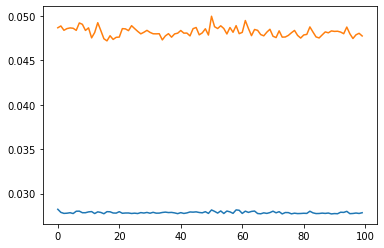

In [101]:
plt.figure()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

In [103]:
monitor_val_acc_3 = EarlyStopping(monitor = "val_acc", patience = 5)
modelCheckpoint_3 = ModelCheckpoint("rnn_model_batch_size_1.hdf5", save_best_only = True)

model_1.compile(loss = "mean_squared_error", optimizer='adam')
history_3 = model_1.fit(x_train, y_train, epochs=100, batch_size = 1, verbose = 1, validation_split = 0.2, callbacks = [modelCheckpoint_3, monitor_val_acc_3])

Train on 211 samples, validate on 53 samples
Epoch 1/100
211/211 [==============================] - 7s 32ms/step - loss: 0.0286 - val_loss: 0.0485
Epoch 2/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0289 - val_loss: 0.0488
Epoch 3/100
211/211 [==============================] - 1s 7ms/step - loss: 0.0288 - val_loss: 0.0490
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0284 - val_loss: 0.0478
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0285 - val_loss: 0.0484
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0285 - val_loss: 0.0473
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0286 - val_loss: 0.0487
Epoch 8/100
211/211 [==============================] - 1s 7ms/step - loss: 0.0281 - val_loss: 0.0495
Epoch 9/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0283 - val_loss: 0.0512
Epoch 10/100
211/211 [=======================

Epoch 81/100
211/211 [==============================] - 2s 7ms/step - loss: 0.0280 - val_loss: 0.0484
Epoch 82/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0284 - val_loss: 0.0477
Epoch 83/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0279 - val_loss: 0.0481
Epoch 84/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0283 - val_loss: 0.0480
Epoch 85/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0283 - val_loss: 0.0482
Epoch 86/100
211/211 [==============================] - 2s 8ms/step - loss: 0.0285 - val_loss: 0.0477
Epoch 87/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0279 - val_loss: 0.0500
Epoch 88/100
211/211 [==============================] - 1s 7ms/step - loss: 0.0287 - val_loss: 0.0499
Epoch 89/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0287 - val_loss: 0.0478
Epoch 90/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0281

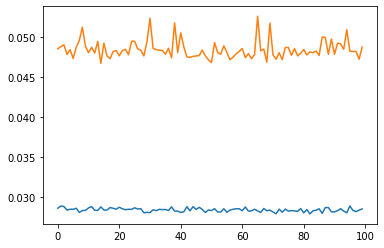

In [105]:
plt.figure()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

***
Al parecer el mejor modelo es el primero por lo que se va a cargar para ser utilizado.

In [106]:
model = load_model("rnn_model.hdf5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [122]:
y_train = escalar.inverse_transform(model.predict(x_train))
y_test = escalar.inverse_transform(model.predict(x_test))

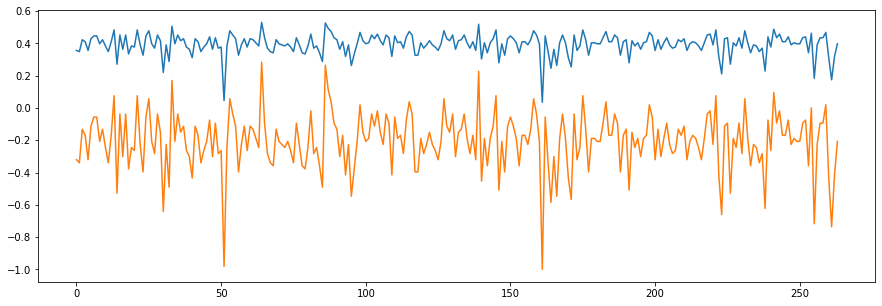

In [124]:
plt.figure(figsize = (15, 5))
plt.plot(y_train)
plt.plot(x_train.reshape(-1,1))

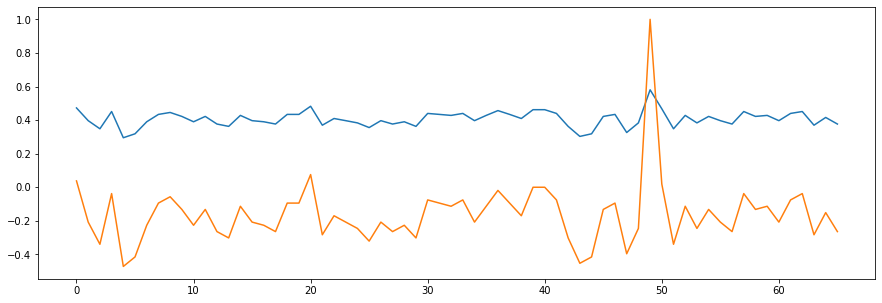

In [126]:
plt.figure(figsize = (15, 5))
plt.plot(y_test)
plt.plot(x_test.reshape(-1,1))

***
# Conclusiones

* Se utilizó una LSTM para una serie de tiempo sobre un data set sobre precios de renta de locales.
* En este caso es necesario reescalar las observaciones para minimizar el mse del modelo.
* En las gráficas de las predicciones se puede observar que predice el modelo predice muy bien, lo único que se debe realizar es un escalado de los datos para que queden en la misma escala que los datos originales.